<a href="https://colab.research.google.com/github/YaraBertazzi/Analise_de_dados1/blob/main/analise_de_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importe e tratamento de dados.

In [1]:
import pandas as pd
import matplotlib

In [2]:
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv('Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep=';')

In [ ]:
display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

In [4]:
#Separando colunas que irei usar
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]


In [5]:
#juntar na tabela de vendas as colunas que preciso
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})


In [ ]:
display(vendas_df)

jerome2@adventure-works.com      9
natalie46@adventure-works.com    9
alavisrk@mlb.com                 9
tfidgett11@studiopress.com       8
zachary48@adventure-works.com    8
                                ..
shawn3@adventure-works.com       1
sjeenesqh@chron.com              1
donna16@adventure-works.com      1
cindy5@adventure-works.com       1
sabrahimny@tripadvisor.com       1
Name: E-mail do Cliente, Length: 28971, dtype: int64

<Axes: >

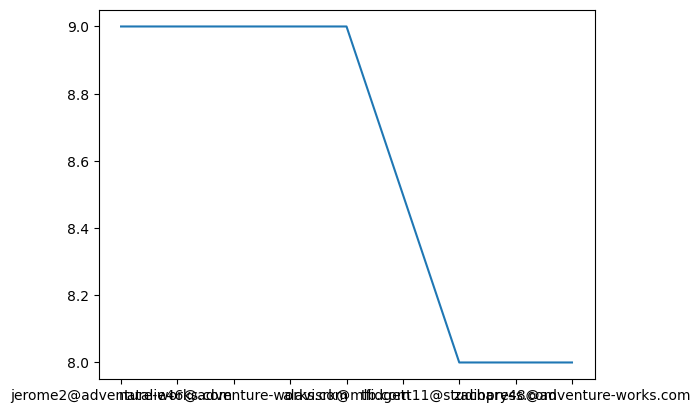

In [6]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)

frequencia_clientes[:5].plot()


https://www.youtube.com/watch?v=kCMaqla6Grs&list=PLpdAy0tYrnKx9CtTmgSdzHz9YQ-C5ZNI9&index=1

In [18]:
faturamento_loja = vendas_df[['ID Loja','Quantidade Vendida']]
faturamento_loja = faturamento_loja.groupby('ID Loja').sum()
display(faturamento_loja)

,Quantidade Vendida
ID Loja,
1,1172.0
2,1404.0
3,949.0
4,1054.0
5,1006.0
...,...
306,33760.0
307,34946.0
308,28673.0


In [42]:
mais_vendida = faturamento_loja.sort_values('Quantidade Vendida',ascending=False)
display(mais_vendida[:1])

,Quantidade Vendida
ID Loja,
200,91440.0


In [50]:
menos_vendida = vendas_df[['ID Produto','Quantidade Vendida']]
menos_vendida = menos_vendida.groupby('ID Produto').sum()
display(menos_vendida[:1])

,Quantidade Vendida
ID Produto,
1.0,374.0
